# Туториал создания простых моделей в MuJoCo (Multi-Joint dynamics with Contact)

Документация по симулятору: https://mujoco.readthedocs.io/en/stable/overview.html

In [1]:
import numpy as np
import mujoco
import mediapy as media # Для воспроизведения видео в ноутбуке
renderer = None

Рассмотрим стандартный XML-файл с моделью
```sh
<mujoco>
  <worldbody>
    <light diffuse=".5 .5 .5" pos="0 0 3" dir="0 0 -1"/>
    <geom type="plane" size="1 1 0.1" rgba=".9 0 0 1"/>
    <body pos="0 0 1">
      <joint type="free"/>
      <geom type="box" size=".1 .2 .3" rgba="0 .9 0 1"/>
    </body>
  </worldbody>
</mujoco>
```

**Два основных объекта для описания нашей модели:**
1. `MjModel` - структура, которая описывает всю физическую модель. Это неизменяемая "схема" мира. Создаётся один раз и не меняется в процессе симуляции. Полное описание MjModel можно найти в конце заголовочного файла [`mjmodel.h`](https://github.com/deepmind/mujoco/blob/main/include/mujoco/mjmodel.h). Там же можно найти короткое описание по каждому из атрибутов.
2. `MjData` - текущее состояние симуляции, связанное с MjModel. В MjData хранятся переменные, которые изменяются на каждом шаге симуляции:
    - положения (`qpos`)
    - скорости (`qvel`)
    - силы (`qfrc`)
    - текущие контакты
    - текущие значения сенсоров
    - производные, матрицы якобианов

    Думаем о `MjData` как о "динамической памяти", которая хранит состояние мира во времени.

In [2]:
model = mujoco.MjModel.from_xml_path("standard_example.xml")
data = mujoco.MjData(model)
print(model)
print(data)

**Две основные функции для симуляции:**
1. `mujoco.mj_step(model, data)` - выполняет один шаг симуляции с учётом динамики модели
    - обновление положения тел
    - обновление скоростей тел
    - учитывание сил, столкновений и т.д.

    Изменяются:

    - `data.time` → возрастает на `model.opt.timestep`
    - `data.qpos` → новое положение тел
    - `data.qvel` → новые скорости тел
    - `data.qacc` → новые ускорения тел
    - `data.contact` → новые контакты
    - `data.sensordata` → обновлённые сенсоры

2. `mujoco.mj_kinematics(model, data)` - единоразовое обновление кинематики

In [3]:
mujoco.mj_resetData(model, data)  # Reset state and time.

Renderer

In [4]:
if renderer is None:
    renderer = mujoco.Renderer(model, width=800, height=600)

""

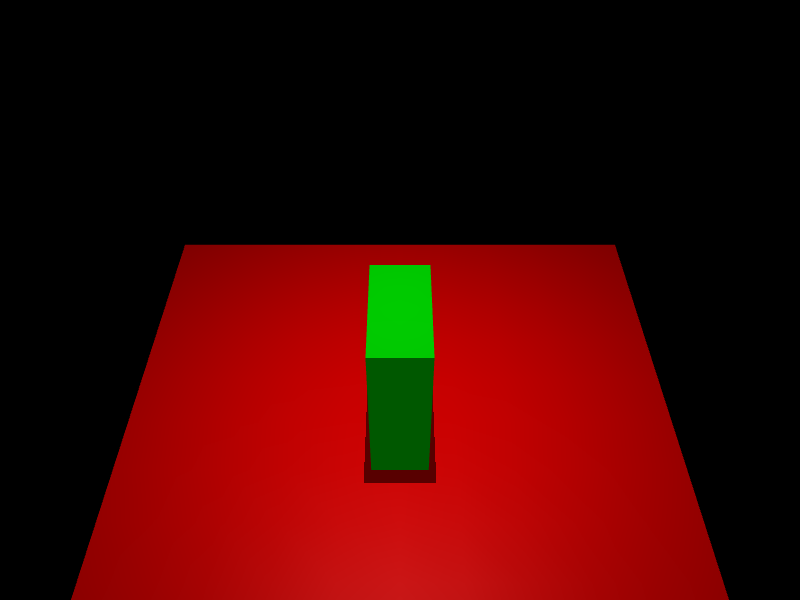

In [7]:
renderer.update_scene(data)
media.show_image(renderer.render())

In [6]:
mujoco.mj_resetData(model, data)

timespan = np.linspace(0, 2, 500)
# print(timespan)
framerate = 30  # (Hz)

# Simulate and display video.
frames = []

for time in timespan:
    #mujoco.mj_kinematics(model, data)
    mujoco.mj_step(model, data)
    if len(frames) < time * framerate:
        renderer.update_scene(data)
        pixels = renderer.render()
        frames.append(pixels)
        
media.show_video(frames, fps=framerate)